<a href="https://colab.research.google.com/github/Kirankumarpetlu/Brain-Tumor-Detection/blob/main/TestBrainTumorDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from torchvision import models
import torch.nn as nn
import torch

# Load base model structure
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)

# Load saved weights
model.load_state_dict(torch.load("/content/drive/MyDrive/BrainTumor/brain_tumor_resnet18.pth", map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu')))
model = model.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
model.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Predicted Class: yes


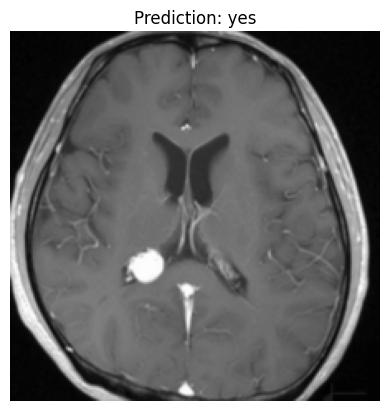

In [5]:
#  Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

#  Step 1: Setup
image_path = "/content/drive/MyDrive/BrainTumor/Screenshot 2025-06-28 224228.png"

from PIL import Image
from torchvision import transforms, models
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#  Step 2: Load model
model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)
model = model.to(device)

# Load trained weights
model.load_state_dict(torch.load("/content/drive/MyDrive/BrainTumor/brain_tumor_resnet18.pth", map_location=device))
model.eval()

#  Step 3: Load and preprocess the image
image = Image.open(image_path).convert('L')

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

image_tensor = transform(image).unsqueeze(0).to(device)

#  Step 4: Predict
with torch.no_grad():
    output = model(image_tensor)
    _, predicted_class = torch.max(output, 1)

class_names = ['no', 'yes']
print(f"Predicted Class: {class_names[predicted_class.item()]}")

#  Step 5: Show image
img_display = image_tensor.squeeze().permute(1, 2, 0).cpu().numpy()
img_display = (img_display * 0.5) + 0.5
plt.imshow(img_display)
plt.title(f"Prediction: {class_names[predicted_class.item()]}")
plt.axis('off')
plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 143.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.3 MB/s 

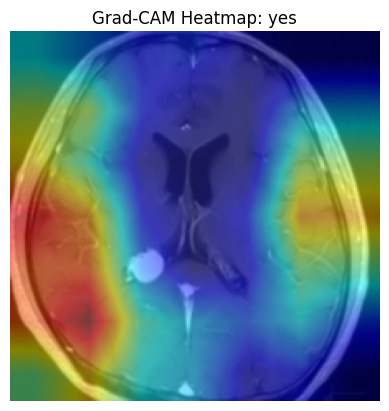

In [6]:
!pip install -q grad-cam

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
import numpy as np

# Set the last conv layer of ResNet18
target_layers = [model.layer4[-1]]

# Create Grad-CAM object
cam = GradCAM(model=model, target_layers=target_layers)

# Define target class
targets = [ClassifierOutputTarget(predicted_class.item())]

# Ensure gradients are computed for the target layer
for param in target_layers[0].parameters():
    param.requires_grad = True

# Generate heatmap
grayscale_cam = cam(input_tensor=image_tensor, targets=targets)[0, :]

# Set requires_grad back to original state if needed (assuming it was False)
for param in target_layers[0].parameters():
    param.requires_grad = False

# Overlay heatmap on image
cam_image = show_cam_on_image(img_display, grayscale_cam, use_rgb=True)

# Display result
plt.imshow(cam_image)
plt.title(f"Grad-CAM Heatmap: {class_names[predicted_class.item()]}")
plt.axis('off')
plt.show()